<a href="https://colab.research.google.com/github/carinebardawil/Fake_News/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:** we wish to detect whether a certain text is fake or real news.

---


**Dataset:** we are given a labelled dataset of news articles.

---


**Solution:** Use a supervised machine learning algorithm to train an NLP model that performs binary classification on text, mainly distinguishing between 2 classes (FAKE, REAL).

---


**Summary of the Approach:** Start by inspecting the data set, perform EDA, cleaning, preprocessing and any necessary data transformation technique. Next, proceed with training at least two models, evaluate models, finally use the selected model for inference. 

---








# Exploring and Manipulating 'Review_Rating' Column

In [1]:
# install datasets
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 16.3 MB/s 
     |████████████████████████████████| 140 kB 38.1 MB/s 
     |████████████████████████████████| 1.1 MB 39.0 MB/s 
     |████████████████████████████████| 212 kB 24.0 MB/s 
     |████████████████████████████████| 101 kB 10.9 MB/s 
     |████████████████████████████████| 596 kB 45.6 MB/s 
     |████████████████████████████████| 127 kB 59.1 MB/s 
     |████████████████████████████████| 144 kB 47.3 MB/s 
     |████████████████████████████████| 271 kB 69.4 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's de

In [2]:
from datasets import load_dataset
 
dataset = load_dataset("datacommons_factcheck", "fctchk_politifact_wapo")

Generating train split:   0%|          | 0/5632 [00:00<?, ? examples/s]

Dataset datacommons_factcheck downloaded and prepared to /root/.cache/huggingface/datasets/datacommons_factcheck/fctchk_politifact_wapo/1.0.0/e3861c84c3e449fb0c316b75997e30bbf723e2ca7f33c668bda07b7436567b35. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['reviewer_name', 'claim_text', 'review_date', 'review_url', 'review_rating', 'claim_author_name', 'claim_date'],
        num_rows: 5632
    })
})


In [40]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#transform the nested dictionary into a dataframe
df=pd.DataFrame.from_dict(dataset['train'])

In [21]:
#inspecting the dataframe
df.info()
shape=df.shape
print('The number of rows is', shape[0],'the number of columns is', shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviewer_name      5632 non-null   object
 1   claim_text         5632 non-null   object
 2   review_date        5632 non-null   object
 3   review_url         5632 non-null   object
 4   review_rating      5632 non-null   object
 5   claim_author_name  5632 non-null   object
 6   claim_date         5632 non-null   object
dtypes: object(7)
memory usage: 308.1+ KB
The number of rows is 5632 the number of columns is 7


In [18]:
df.head()

,reviewer_name,claim_text,review_date,review_url,review_rating,claim_author_name,claim_date
0,PolitiFact,"Quotes Michelle Obama as saying, ""White folks ...",2019-01-03,https://www.politifact.com/facebook-fact-check...,Pants on Fire,Facebook posts,2019-01-01
1,PolitiFact,"Says Facebook shut down a ""Chick-Fil-A Appreci...",2018-04-23,https://www.politifact.com/texas/statements/20...,Half True,Ted Cruz,2018-04-11
2,PolitiFact,"""We haven’t given up anything other than … I a...",2018-06-12,http://www.politifact.com/truth-o-meter/articl...,Will military drills end?,Donald Trump,2018-06-12
3,FactCheck.org,"""BREAKING: 2 Democrat Congressmen On ISIS Payr...",2017-10-26,https://www.factcheck.org/2017/10/no-isis-arre...,False,Various websites,2017-09-03
4,PolitiFact,"The ""Dallas Cowboys can’t put a sticker on the...",2016-09-01,https://www.politifact.com/texas/statements/20...,True,James Woods,2016-08-27


Initial inspection of the dataframe indicates that there exists several classes in the review_rating column, before dropping any valuable info, let us try to understand how these labels are distributed across the dataset. 

In [25]:
#Let us start by looking into the unique counts of classes in review_rating:
classes=df['review_rating'].value_counts()
print(classes)

False                        1304
Mostly False                  671
Pants on Fire                 666
Half True                     645
Mostly True                   594
                             ... 
Key checks continue             1
History poses big hurdle        1
Lacks evidence                  1
Debunked by Snopes              1
Voice Analyst: It's Trump       1
Name: review_rating, Length: 391, dtype: int64


We have a total of 391 labels/classes.

In [28]:
#transform the series describing unique counts of classes/labels into a dataframe for convenience (visualization + statistics)
df_classes=classes.to_frame()

In [36]:
df_classes.describe()

,review_rating
count,391.000000
mean,14.404092
std,94.952298
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1304.000000


Observation: from the total 391 classes/labels almost 75% of the labels in the dataset occur once! Having a mean of 14.4 which represents on an average each class how much is it occuring? is basically a useless number, specially that the std is almost 95 and the max is 1304. 
Takeaway: The distribution of the 391 classes (review_rating column) seems to be highly imbalanced, visuals are needed to further validate this observation and to gain some insight onto how we should manipulate the review_rating column.

Text(0.5, 1.0, 'Box plot')

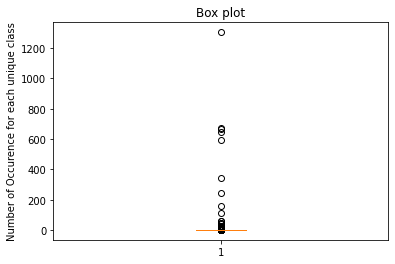

In [35]:
#Box plot
plt.boxplot(df_classes['review_rating'])
plt.ylabel('Occurence for each unique class')
plt.title('Box plot')

The box plot compliments the observations made in the preceeding code cell, distribution looks HIGHLY skewed to the right, i.e. majority of classes/labeles present in review_rating column are infrequently occuring (their occurence is mainly equal to 1). Also, 25% and 75% quartiles are coinciding with the median. The 'outlier' classes/labels showing in this boxplot corresponding to the newly created dataframe are effectively the dominating labels in the original dataset dataframe with occurences around ~~ [200,400] & [600,800] & 1300.

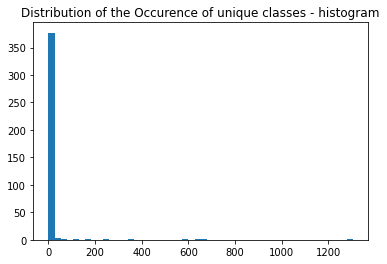

In [49]:
#Histogram
plt.hist(df_classes['review_rating'], 50) # 50 is the number of bins ~each bin has a length of almost 1300/50=26
plt.title('Distribution of the Occurence of unique classes - histogram')
plt.show()

By looking at the above histogram, the previously made observations are re-inforced. We are 100% of the right skewness in the distribution of occurences of classes/labels. Classes occuring less than 26 times (first bin in histogram) are in total of almost 375, classes occuring more frequently (almost 200, 300, 600, or 1300 times ~ by checking the X-axis of histogram) are approximately 7-8.


---


Going back to the original dataframe containing our dataset, let us start by dropping classes occuring less or equal to 26 times in total, and from there onwards we consider regrouping the remaining ones towards having 2 classes.

In [71]:
#drop rows containing a label in review_rating column occuring less than 78 times
for i in range (26):
  filtered_df=df[df.review_rating.isin(classes.index[classes.gt(i)])]


In [72]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5631
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   reviewer_name      5051 non-null   object
 1   claim_text         5051 non-null   object
 2   review_date        5051 non-null   object
 3   review_url         5051 non-null   object
 4   review_rating      5051 non-null   object
 5   claim_author_name  5051 non-null   object
 6   claim_date         5051 non-null   object
dtypes: object(7)
memory usage: 315.7+ KB


In [74]:
filtered_classes=filtered_df['review_rating'].value_counts()
print(filtered_classes)

False                  1304
Mostly False            671
Pants on Fire           666
Half True               645
Mostly True             594
True                    343
Four Pinocchios         246
Three Pinocchios        160
Two Pinocchios          112
Distorts the Facts       61
Misleading               60
No Evidence              49
Not the Whole Story      45
Spins the Facts          41
Not the whole story      27
Needs context            27
Name: review_rating, dtype: int64


For the following labels: No evidence, Not the Whole Story, spins the facts, Not the whole story, Needs context, Misleading => I am not able to infer from these labels whether the news article is fake or real, hence I am not sure how I can use these labels in re-grouping them into Fake or Real News, so I am going to drop them and regroup the rest as follows:
1. False, mostly false, pants on fire, half true, four pinocchios, three pinocchios, two pinocchios, distorts the fact ===> FAKE: 0,
2. Mostly True, True ==> REAL: 1. 


I made the assumption of Mostly True to be Real news, and Half true to be Fake news. 

In [76]:
#re-iterating to remove the above-mentioned classes 
for i in range (61):
  filtered_df=df[df.review_rating.isin(classes.index[classes.gt(i)])]

#double-check:
filtered_classes=filtered_df['review_rating'].value_counts()
print(filtered_classes)

False                 1304
Mostly False           671
Pants on Fire          666
Half True              645
Mostly True            594
True                   343
Four Pinocchios        246
Three Pinocchios       160
Two Pinocchios         112
Distorts the Facts      61
Name: review_rating, dtype: int64


In [77]:
Labels = {'False':0, 'Mostly False':0, 'Pants on Fire':0, 'Half True': 0, 'Mostly True': 1, 'True': 1, 'Four Pinocchios': 0, 'Three Pinocchios': 0, 'Two Pinocchios': 0, 'Distorts the Facts': 0}
filtered_df['review_rating']=filtered_df['review_rating'].apply(lambda x:Labels[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
filtered_df['review_rating'].value_counts()

0    3865
1     937
Name: review_rating, dtype: int64

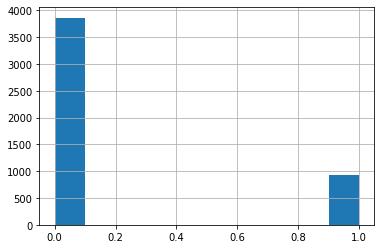

In [79]:
filtered_df['review_rating'].hist()

It is clearly seen that the data set is highly imbalanced: ~ 20% for REAL, 80% for FAKE. It is best recommended to address data imbalance prior to training a model so that we do not end up biasing the model in favor to the majority class (which is FAKE in our case). In NLP applications, there exists several techniques in data augmentation to address this imbalance, however, we have to be careful in deciding the method that works best, and this is usually a fruit of experiemntation, namely an iterative trial and error process. At this point, I will proceed with this imbalanced data set, and we will deal with this later on after having defined the preprocessing flow.

In [139]:
#first things first, let us drop the unecessary columns from the filtered dataframe and keep the text and review rating columns:
data=filtered_df[['claim_text', 'review_rating']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 5631
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   claim_text     4802 non-null   object
 1   review_rating  4802 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 241.6+ KB


In [140]:
#change the target column from int64 to int32 to reduce memory
data['review_rating']=data['review_rating'].astype('int32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 5631
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   claim_text     4802 non-null   object
 1   review_rating  4802 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 93.8+ KB


In [94]:
#double check if null values exist, even if it is obvious from the previous cell's result
data.isnull().values.any()

False

# Data Cleaning and Preprocessing 

Cleaning steps include:
1. converting lower case to upper case,
2. removing non alphabetic characters,
3. tokenizing and stemming,
4. removing stop words 


In [99]:
#importing necesssary librairies
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')
english_stopwords = stopwords.words('english')

stemmer = PorterStemmer()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [100]:
#define a function responsible of all the cleaning steps 
def clean_text(text):
  # convert to lower case
  text = text.lower()

  # remove none alphabetic characters
  text = re.sub(r'[^a-z]', ' ', text)


  # stem words 
  # split into words
  tokens = word_tokenize(text)

  # stemming of words
  stemmed = [stemmer.stem(word) for word in tokens]

  text = ' '.join(stemmed)#now we reconstruct the sentence by joining them through a space character

  # remove stopwords
  text = ' '.join([word for word in text.split() if word not in english_stopwords]) 
  return text

In [101]:
#let us test it on a text and see the outcome:
print(data['claim_text'][1])
print(clean_text(data['claim_text'][1]))

Says Facebook shut down a "Chick-Fil-A Appreciation Day."
say facebook shut chick fil appreci day


In [141]:
#now apply the cleaning steps on all the texts found in the dataframe
# apply to all dataset
data['claim_text'] = data['claim_text'].apply(clean_text)
data.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,claim_text,review_rating
0,quot michel obama say white folk wrong america,0
1,say facebook shut chick fil appreci day,0
3,break democrat congressmen isi payrol arrest t...,0
4,dalla cowboy put sticker helmet polic offic kill,1
5,tom suozzi rais tax hundr million dollar nassa...,1


Let us split the data set into training and testing:

In [142]:
from sklearn.model_selection import train_test_split


X = data['claim_text'].values
y = data['review_rating'].values

# Split data into 80% training & 20% test
# let's all use a random state of 42 for example to ensure having the same split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3841,) (3841,)
(961,) (961,)


Let us perform feature extraction using a bag of words

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

# define a CountVectorizer (with binary=True and max_features=10000)
vectorizer = CountVectorizer(binary=True, max_features=100000)  

# learn the vocabulary of all tokens in our training dataset
vectorizer.fit(x_train)  

# transform x_train to bag of words
x_train_bow = vectorizer.transform(x_train)  
x_test_bow = vectorizer.transform(x_test)   

print(x_train_bow.shape, y_train.shape)#each row should have a max. size of 10 000 
print(x_test_bow.shape, y_test.shape)

(3841, 5210) (3841,)
(961, 5210) (961,)


# Logistic Regression for Binary Classification: Training and Evaluation Metrics

Let us train a logistic regression model to perform binary classification

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# define the LogisticRegression classifier
model = LogisticRegression()

# train the classifier on the training data
model.fit(x_train_bow, y_train)
print('Model trained!')

# get the mean accuracy on the training data
acc_train = model.score(x_train_bow, y_train) 


print('Training Accuracy:', acc_train)

Model trained!
Training Accuracy: 0.9276230148398854


In [116]:
#test set:
y_pred=model.predict(x_test_bow)

In [117]:
#test set metrics
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print('Accuracy:',accuracy)
print('Recall:', recall)
print('Precision:',precision)
print('F1 score:',f1)

Accuracy: 0.785639958376691
Recall: 0.1932367149758454
Precision: 0.5063291139240507
F1 score: 0.27972027972027974


In [123]:
#number of samples of the testing data set 
sample_number=y_test.shape[0]
#How many times the classifier was wrong:
y_wrong = np.count_nonzero(y_test - y_pred, axis = 0)
#How many times the classifier was correct:
y_correct = sample_number - y_wrong
#Accuracy formula:
accuracy = float(y_correct) / sample_number

print("Classifier has ", y_correct, " good classified outputs")
print("Classifier has ", y_wrong, " wrong classified outputs")
print("Classifier has an accuracy score of ", accuracy*100, "%")

Classifier has  755  good classified outputs
Classifier has  206  wrong classified outputs
Classifier has an accuracy score of  78.5639958376691 %


In [121]:
#Let us dive a bit deeper by deriving confusion matrix, true positives, true negatives, false positives, and false negatives to be able to interpret precision, recall, f1:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, y_pred)
TN, FP, FN, TP=confusion_matrix(y_test, y_pred).ravel()

print(conf)

[[715  39]
 [167  40]]


In [126]:
#Rates:

TPR = float(TP) / np.sum(y_test) #Recall
TNR = float(TN) / (sample_number - np.sum(y_test))
FPR = float(FP) / (sample_number - np.sum(y_test))
FNR= float(FN) / np.sum(y_test)

print ("TPR : ", TPR)
print ("TNR :  " , TNR)
print ("FPR : ", FPR)
print ("FNR : ", FNR)

#Precision and Recall and F1 score - recalculated manually:
P = float(TP)/np.sum(y_pred)
F1=2*P*TPR/(P+TPR)
print ("Precision: ", P)
print("Recall: ", TPR)
print("F1 Score:", F1)

TPR :  0.1932367149758454
TNR :   0.9482758620689655
FPR :  0.05172413793103448
FNR :  0.8067632850241546
Precision:  0.5063291139240507
Recall:  0.1932367149758454
F1 Score: 0.27972027972027974


***The performance is not satisfactory, not only because of the 78% accuracy, but also by looking at other classification metrics: a precision of 50% is an indication that out of all the news that were classified by our model as Real, only 50% of them are actually Real/correctly classified! a 20% Recall is an indication that our model was only able to correctly catch 20% of the actual Real news articles! F1 score is usually the go to metric when working with imbalanced dataset, which is our case, however, the F1 score is only 27% which is also looking bad... These metrics are not only indicative of a poorly performing model, but also due to the high imbalance in the dataset. In fact, the share of the actual negatively labeled classes (FAKE) is TN+FP= 715+39= 754 is much higher than the actual positively labeled classes (REAL) which is 167+40= 207.

***Moreover, by looking at our confusion matrix:
the model has TN=715, which means it caught 715 fake news (that were actually labelled as fake), it has also mislabeled 39 news as being Real (while in reality they are FAKE). In addition, the model wrongly classified 167 articles as being fake and was able to correctly classify 40 instances as being real out of 207 actual real articles in the test set. Obviously, the model is biased towards the FAKE news class, and the TPR,TNR, FPR, FNR are a true indication of that!

*** So what can be done next? 
Towards improving the ML model, one can take two separate directions: Either model-oriented improvements (such as changing ML algorithm, perform hyper-parameter tuning) OR data-oriented approach (such as dealing with bias, imbalances, increasing data set size by augmentation or simply collecting more data!)

# Logistic Regression Model Improvement: Hyper-parameter Tuning 

As a first step towards improving our model, let us perform  model improvement by Hyper-parameter tuning. For this matter we will use Grid Search to find what is the best regularization method to be used:

In [127]:
#Grid Search CV for regularization 
from sklearn.model_selection import GridSearchCV
model1 = LogisticRegression(solver='liblinear')

param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1']},
  {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2']},
 ]

clf = GridSearchCV(model1, param_grid, cv=5, refit=True, return_train_score=True)
clf.fit(x_train_bow, y_train)
y_pred1=clf.predict(x_test_bow)

In [129]:
print('The best score is:', clf.best_score_)
print('The best parameters are:', clf.best_params_)
accuracy=accuracy_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)
print('Accuracy:',accuracy)
print('Recall:', recall)
print('Precision:',precision)
print('F1 score:',f1) 

The best score is: 0.8112456653662766
The best parameters are: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.7835587929240374
Recall: 0.024154589371980676
Precision: 0.45454545454545453
F1 score: 0.045871559633027525


We can deduce that performing hyperparameter tuning as model-based approach to improve the performance did not add any value, so, we are going to disregard Model1 and test another way of model-based approach using Deep learning

# Deep Learning Model for Binary Classification

In this section we will opt for deep learning hoping to improve the performance of the classifier, same cleaning steps will be adopted except we will use the tokenizer from TF and Keras, while keeping the same train, test split used previously. 

In [164]:
#importing necessary librairies 
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding, LSTM, Dense

Longest sentence has 78 words


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


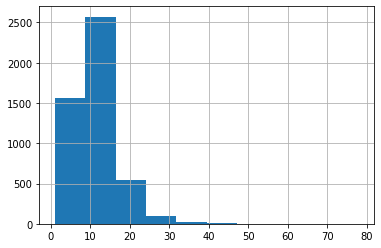

In [143]:
#First, let us check the length distribution across rows (total number of words in each news article/row) 

#augment original dataframe with a column recording length of each sentence:
data["Article Length"] = data["claim_text"].apply(lambda x: len(x.split()))
#check distribution
data["Article Length"].hist()
#Print the number of words in the longest sentence/news article
max_words = max(data["Article Length"])
print('Longest sentence has',max_words,'words')

In [145]:

# define your tokenizer (with num_words=10000)
tokenizer_obj = Tokenizer(num_words=10000)

# assign an index (number) to each word using fit_on_texts function  
tokenizer_obj.fit_on_texts(x_train)

# will be used later to pad sequences
max_length = max_words

# define vocabulary size
vocab_size = len(tokenizer_obj.word_index) 

# transform each text to a sequence of integers (to be used later in embeddings layer)
X_train_tokens =  tokenizer_obj.texts_to_sequences(x_train)#we'll end up with integer encoded sequence
X_test_tokens = tokenizer_obj.texts_to_sequences(x_test)

# apply post-padding to the sequences
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')#integer encoded sequence
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')#it will have same length of sequence as train

In [146]:
#let us check an encoded text
x_train[0], X_train_pad[0]

('say marsha blackburn vote reauthor violenc women act attempt protect women domest violenc stalk date rape',
 array([   1, 1903, 2346,   17, 2347,  366,   80,  120,  985,  176,   80,
         898,  366, 2348, 1904,  316,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0], dtype=int32))

In [148]:
#let us check the size of the vocab:
print("Vocabulary Size is",vocab_size)

Vocabulary Size is 5227


In [167]:

#Define the model:
embedding_dim = 150

model2=Sequential()
model2.add(Embedding(vocab_size+1,embedding_dim,input_length=max_length))
model2.add(LSTM(70))#LSTM require at least one arg, for exple number of recurrent units chosen at random to be 70
model2.add(Dense(40,activation='relu'))#we cannot directly add output layer, we must add a hidden layer in between
model2.add(Dense(1,activation='sigmoid'))#obviously this is a binary classification problem

# Compile the model: assign loss & optimizer
model2.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics=['Accuracy', 'Precision','Recall'])

model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 78, 150)           784200    
                                                                 
 lstm_12 (LSTM)              (None, 70)                61880     
                                                                 
 dense_14 (Dense)            (None, 40)                2840      
                                                                 
 dense_15 (Dense)            (None, 1)                 41        
                                                                 
Total params: 848,961
Trainable params: 848,961
Non-trainable params: 0
_________________________________________________________________


In [169]:
#train
model2.fit(X_train_pad, y_train, batch_size=10, epochs=20, validation_data=(X_test_pad, y_test))

Epoch 1/20
385/385 [==============================] - 31s 80ms/step - loss: 0.4881 - Accuracy: 0.8099 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5302 - val_Accuracy: 0.7846 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
385/385 [==============================] - 21s 55ms/step - loss: 0.4879 - Accuracy: 0.8099 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5352 - val_Accuracy: 0.7846 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
385/385 [==============================] - 21s 55ms/step - loss: 0.4864 - Accuracy: 0.8099 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5211 - val_Accuracy: 0.7846 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
385/385 [==============================] - 21s 55ms/step - loss: 0.4874 - Accuracy: 0.8099 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5213 - val_Accuracy: 0.7846 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
385/385 [============

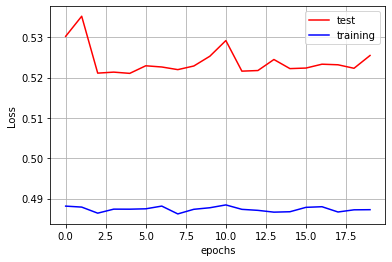

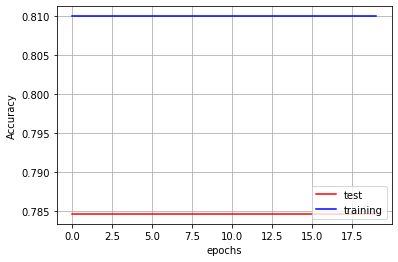

In [172]:
#plot the DL model training history to have an understanding of the modelconvergence
def plot_accuracy_and_loss(model):
    epochs = model.history.params['epochs']
    epochs = range(epochs)
    val_loss = model.history.history['val_loss']
    val_accuracy = model.history.history['val_Accuracy']
    training_loss = model.history.history['loss']
    training_accuracy = model.history.history['Accuracy']

    plt.plot(epochs, val_loss, 'r', label='test')
    plt.plot(epochs, training_loss, 'b', label='training')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

    plt.plot(epochs, val_accuracy, 'r', label='test')
    plt.plot(epochs, training_accuracy, 'b', label='training')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_accuracy_and_loss(model2)

We notice how performance stagnates at a certain accuracy level (whether train/validation) as well as the validation and training loss! implementing model checkpoints for early stopping would have definetely saved some training time, as at some point increasing nbr of epochs did not add much of improvment to the model.

Moreover, by looking at precision and recall during training we notice that they are equal to zero across all epochs (for train and validation), which validates that judging performance based on  accuracy is useless. The fact that precision and recall are equal to zero, it only means one thing: the numerator in the formula of precision and recall is the same,i.e. TP=True Positive, and is zero at all time, which leads to having a zero recall and precsion as a consequence: The model is not able to detect True Positives!

Conclusion: 
1. The model2 is biased towards the negative class, i.e. FAKE news, which is not surprizing at all => it is the same conclusion obtained while training a logistic regression model.
2. The logistic regression model might be better than the DL model for this given dataset.
3. The adopted Model Improvments techniques have failed to improve performance since they do not address the root cause of the poor perfromance, which is Data Imbalance!

# What are the future steps?

Augmenting the data set by either getting more data or synthetically augmenting the data set